# Introduction to time series analysis

<img src="media/cover.png" style="width: 40%; display: block; margin: auto;">

## Introduction

In this lecture we will cover the following topics:

- Definition of time series data.
- Introduction to time series analysis and application examples.
- The main components of a time series.
- Time series decomposition.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from scipy.fft import fft
np.random.seed(0)  # for reproducibility

---

## Basics

### What is a time series?

- A time series is a sequence of data points organized in time order.
- Usually, the time signal is sampled at equally spaced points in time.
- These can be represented as the sequence of the sampled values.

<img src="media/ts_equal.png" style="width: 50%; display: block; margin: auto;">

- Irregularly sampled time signals can still be represented as a time series.
- It is necessary to encode this additional information into an additional data structure.

<img src="media/ts_unequal.png" style="width: 50%; display: block; margin: auto;">

### What data are represented as time series?

- Time series are found in a myriad of natural phenomena, industrial and engineering applications, business, human activities, and so on.

<img src="media/passengers.png" style="width: 70%; display: block; margin: auto;">

<img src="media/co2.png" style="width: 70%; display: block; margin: auto;">

<img src="media/sunspots.png" style="width: 70%; display: block; margin: auto;">

<img src="media/electricity.png" style="width: 70%; display: block; margin: auto;">

<img src="media/water_temps.png" style="width: 70%; display: block; margin: auto;">

- Other examples include data from:
    - Finance: stock prices, asset prices, macroeconomic factors.
    - E-Commerce: page views, new users, searches.
    - Business: transactions, revenue, inventory levels.
    - Natural language: machine translation, chatbots.

### Time series analysis

The main pruposes of time series analysis are:
1. To **understand** and characterize the underlying process that generates the observed data.
2. To **forecast** the evolution of the process, i.e., predict the next observed values.

- There are two main different perspectives to look at a time series.
- Each perspective leads to different time series analysis approaches

#### Statistics perspective

- A time series is a sequence of *random variables* that have some correlation or other distributional relationship between them. 
- The sequence is a realization (observed values) of a stochastic process.
- Statistical time series approaches focus on finding the parameters of the stochastic process that most likely produced the observed time series.

<img src="media/random_var.png" style="width: 30%; display: block; margin: auto;">

#### Dynamical system perspective

- This perspective assumes that there is a system governed by unknown variables $\{x_1, x_2, x_3, \dots ,x_𝑁\}$.
- Generally, we only observe one time series $y$ generated by the system.
- What can $y$ be?
    - One of the system variables.
    - A function $f$ of system variables.
- The objective of the analysis is to reconstruct the dynamics of the entire system from $y$.

<img src="media/partial.png" style="width: 30%; display: block; margin: auto;">

### Applications

Time series analysis is applied in many real world applications, including
- Economic forecasting
- Stock market analysis
- Demand planning and forecasting
- Anomaly detection
- … And much more

**Economic Forecasting**

- Time series analysis is used in macroeconomic predictions.
- World Trade Organization does time series forecasting to predict levels of international trade [[source](https://www.econ-jobs.com/research/36056-Forecasting-international-trade-A-time-series-approach.pdf)].
- Federal Reserve uses time series forecasts of the economy to set interest rates [[source](https://www.federalreserve.gov/pubs/feds/2009/200910/200910pap.pdf)].

<img src="media/economic.png" style="width: 50%; display: block; margin: auto;">

**Demand forecasting**

- Time series analysis is used to predict demand at different levels of granularity.
- Amazon and other e commerce companies use time series modeling to predict demand at a product geography level [[source](https://www.theverge.com/2014/1/18/5320636/amazon-plans-to-ship-your-packages-before-you-even-buy-them)].
- Helps meet customer needs (fast shipping) and reduce inventory waste

<img src="media/ecommerce.png" style="width: 50%; display: block; margin: auto;">

**Anomaly detection**

- Used to detect anomalous behaviors in the underlying system by looking at unusual patterns in the time series.
- Widely used in manufacturing to detect defects and target preventive maintenance [[source](https://papers.phmsociety.org/index.php/phme/article/view/1256/phmec_20_1256)].
- With new IoT devices, anomaly detection is being used in machinery heavy industries, such as petroleum and gas [[source](https://arxiv.org/abs/1607.02480)].

<img src="media/anomaly.png" style="width: 50%; display: block; margin: auto;">

---

## Time series components

- A time series is often assumed to be composed of three components:
    - *Trend*: the long-term direction.
    - *Seasonality*: the periodic behavior.
    - *Residuals*: the irregular fluctuations.

### Trend

- Trend captures the general direction of the time series.
- For example, increasing number of passengers over the years despite seasonal fluctuations.
- Trend can be increasing, decreasing, or constant.
- It can increase/decrease in different ways over time (linearly, exponentially, etc…).

<img src="media/passengers_trend.png" style="width: 70%; display: block; margin: auto;">

- Let's create a trend from scratch to understand how it looks like.

In [2]:
time = np.arange(144)
trend = time * 2.65 +100

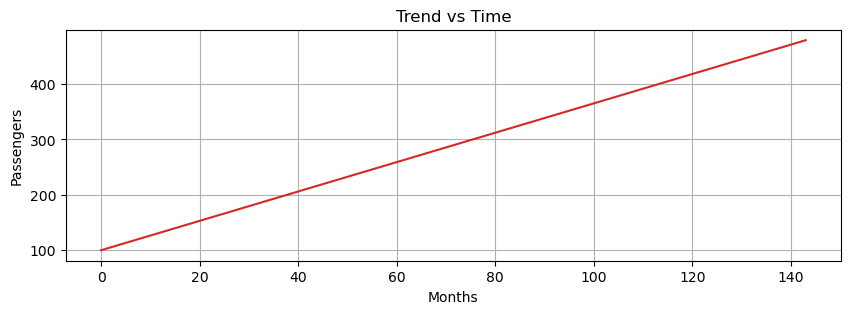

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, trend, color='tab:red')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Trend vs Time");

### Seasonality

- Periodic fluctuations in time series data that occur at regular intervals due to seasonal factors.
- It is characterized by consistent and predictable patterns over a specific period (e.g., daily, monthly, quarterly, yearly).

It can be driven by many factors.
- Naturally occurring events such as weather fluctuations caused by time of year.
- Business or administrative procedures, such as start and end of a school year.
- Social or cultural behavior, e.g., holidays or religious observances.

- Let's generate the seasonal component.

In [4]:
seasonal = 20 + np.sin( time * 0.5) * 20

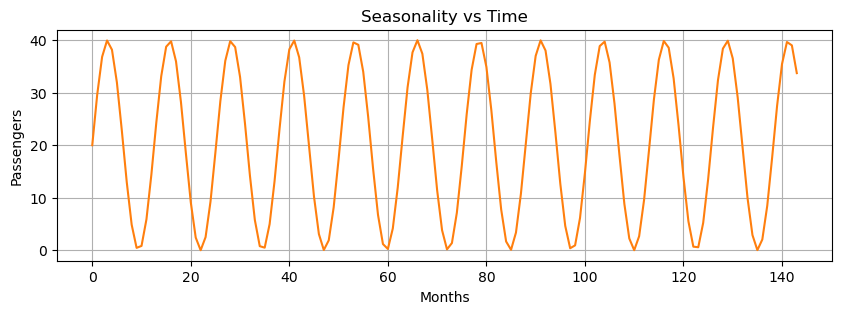

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, seasonal, color='tab:orange')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Seasonality vs Time");

### Residuals

- Residuals are the random fluctuations left over after trend and seasonality are removed from the original time series.
- One should not see a trend or seasonal pattern in the residuals.
- They represent short term, rather unpredictable fluctuations.

In [6]:
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

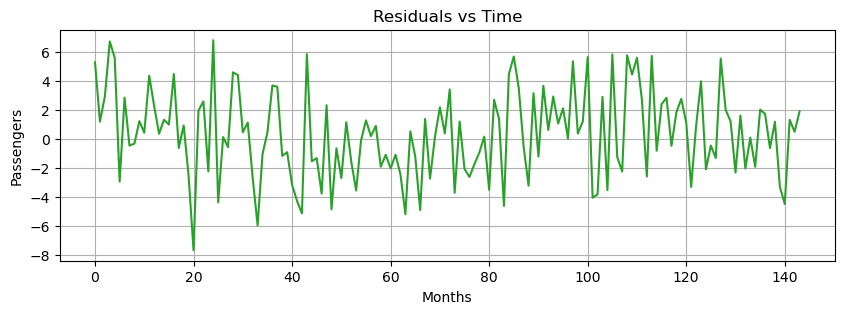

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, residuals, color='tab:green')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.grid()
plt.title("Residuals vs Time");

---

## Decomposition Models

- Time series components can be decomposed with the following models:
    1. Additive decomposition
    2. Multiplicative decomposition
    3. Pseudoadditive decomposition

### Additive model

- Additive models assume that the observed time series is the sum of its components: 

$$X(t) = T(t) + S(t) + R(t)$$  

- where
    - $X(t)$ is the time series   
    - $T(t)$ is the trend  
    - $S(t)$ is the seasonality  
    - $R(t)$ is the residual  
- Additive models are used when the magnitudes of the seasonal and residual values do not depend on the level of the trend.

In [8]:
additive = trend + seasonal + residuals

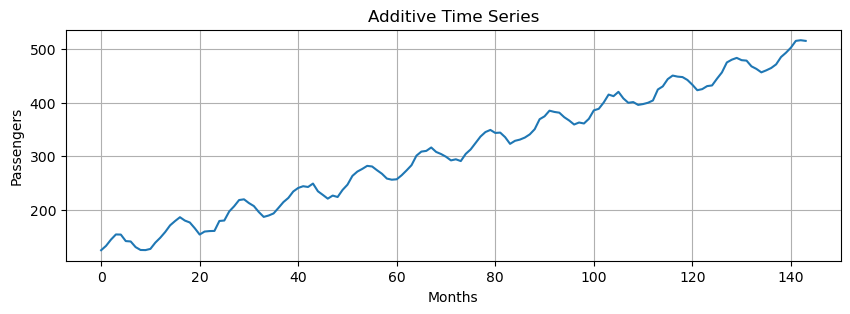

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, additive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Additive Time Series")
plt.grid();

### Multiplicative Model

- Assumes that the observed time series is the product of its components: 

$$X(t) = T(t) \cdot S(t) \cdot R(t)$$

- It is possible to transform a multiplicative model to an additive one by applying a log transformation: 

$$\log \left( T(t) \cdot S(t) \cdot R(t) \right) = \log(T(t)) + \log(S(t)) + \log(R(t))$$

- Multiplicative models are used when the magnitudes of seasonal and residual values depends on trend.

In [10]:
multiplicative = trend * seasonal # we do not include the residuals to make the pattern more clear

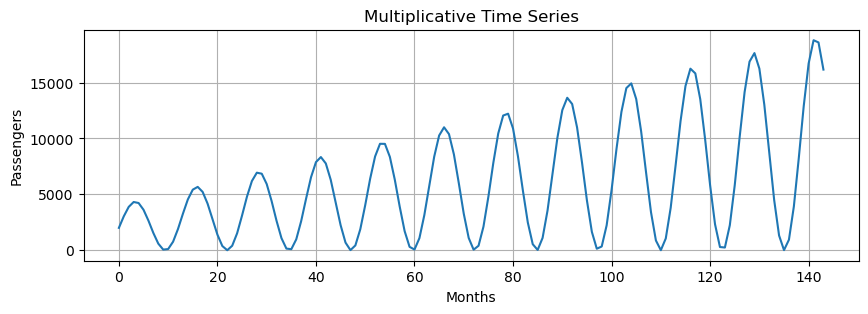

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, multiplicative, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Multiplicative Time Series")
plt.grid();

### Pseudoadditive Model

- Pseudoadditive models combine elements of the additive and multiplicative models.
- Useful when:
    - Time series values are close to or equal to zero. Multiplicative models struggle with zero values, but you still need to model multiplicative seasonality.
    - Some features are multiplicative (e.g., seasonal effects) and other are additive (e.g., residuals).
    - Complex seasonal patterns or data that do not completely align with additive or multiplicative model.

- For example, this model is particularly relevant for modeling series that:
    - are extremely weather-dependent,
    - have sharply pronounced seasonal fluctuations and trend-cycle movements.
- Formulation: 

$$X(t) = T(t) + T(t)\cdot(S(t) - 1) + T(t)\cdot(R(t) - 1) = T(t)\cdot(S(t) + R(t) -1)$$

In [12]:
pseudoadditive = trend * (seasonal + residuals - 1)

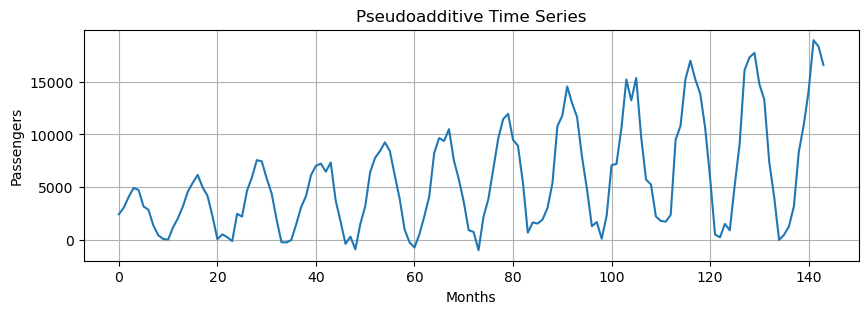

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 3))
ax.plot(time, pseudoadditive, 'tab:blue')
ax.set_xlabel("Months")
ax.set_ylabel("Passengers")
plt.title("Pseudoadditive Time Series")
plt.grid();

---

## Time Series Decomposition

- Now let's reverse directions. 
- We have additive and multiplicative data. 
- Let's decompose them into their three components. 

- A very simple, yet often useful, approach is to estimate a *linear* trend.
- A *detrended* time series is obtained by subtracting the linear trend from the data.
- The linear trend is computed as a 1st order polynomial.

In [14]:
slope, intercept = np.polyfit(np.arange(len(additive)), additive, 1) # estimate line coefficient
trend = np.arange(len(additive)) * slope + intercept # linear trend
detrended = additive - trend # remove the trend

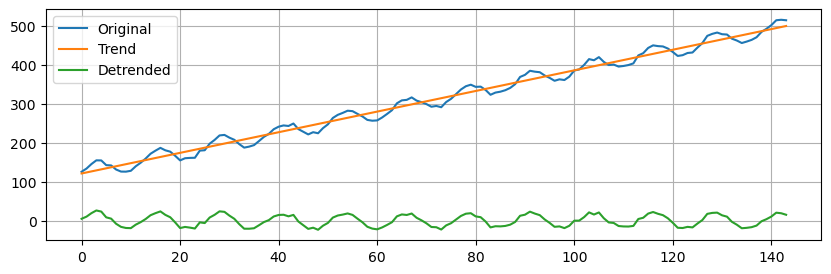

In [15]:
plt.figure(figsize=(10, 3))
plt.plot(additive, label='Original')
plt.plot(trend, label='Trend')
plt.plot(detrended, label='Detrended')
plt.grid()
plt.legend();

- Next, we will use `seasonal_decompose` (more information [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html)) to isolate the main time series components.
- This is a simple method that requires us to specify the type of model (additive or multiplicative) and the main period.

### Additive Decomposition

- We need to specify an integer that represents the main seasonality of the data.
- By looking at the seasonal component, we see that the period is *approximately* $12$ time steps long.
- So, we set `period=12`.

In [16]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=12)

In [17]:
# Utility function to make the plots
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 5))
    axes[0].plot(original, label='Original')
    axes[0].legend(loc='upper left')
    axes[1].plot(decomposition.trend, label='Trend')
    axes[1].legend(loc='upper left')
    axes[2].plot(decomposition.seasonal, label='Seasonality')
    axes[2].legend(loc='upper left')
    axes[3].plot(decomposition.resid, label='Residuals')
    axes[3].legend(loc='upper left')
    plt.show()

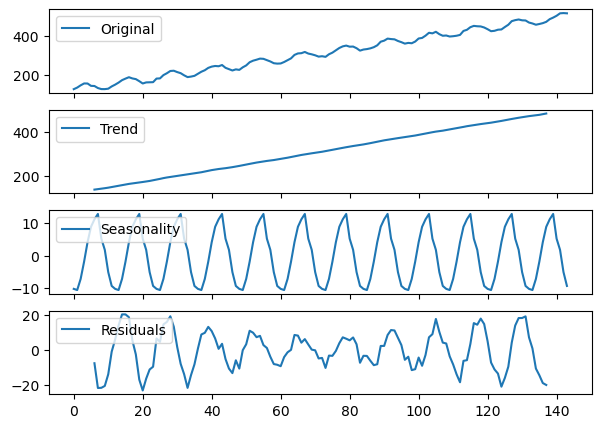

In [18]:
seas_decomp_plots(additive, additive_decomposition)

- The blue line in each plot representes the decomposition. 
- There is a legend in the upper left corner of each plot to let you know what each plot represents. 
- You can see the decomposition is not perfect with regards to seasonality and residuals, but it's pretty close. 

- You may notice both *trend* and *residuals* are missing data towards the beginning and end. 
- This has to do with how trend is calculated (beyond the scope of this lesson). 
- The residuals are missing simply because $R_{t} = Y_{t} - T_{t} - S_{t}$, so missing trend values mean missing residual values as well. 
- In other words, there is nothing wrong with these graphs. 

### Multiplicative Decomposition

- We use the same function as before, but on the `multiplicative` time series.
- Since we know this is a multiplicative time series, we declare `model='multiplicative'` in `seasonal_decompose`.

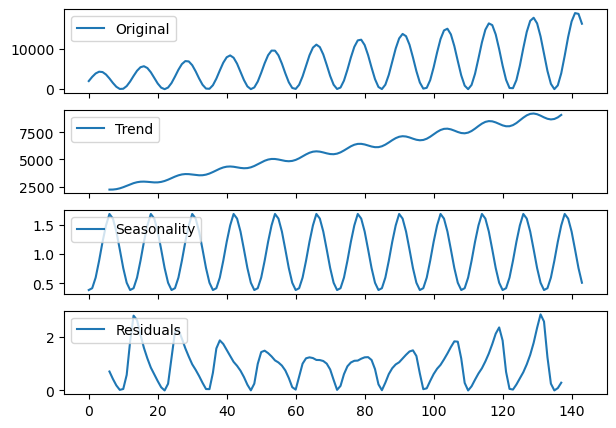

In [19]:
multiplicative_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=12)
seas_decomp_plots(multiplicative, multiplicative_decomposition)

- Again, the decomposition does a relatively good job picking up the overall trend and seasonality.
- We can see the shapes follow the patterns we expect. 

### Locally estimated scatterplot smoothing (LOESS)
- Next, we try a second method called `STL` (Seasonal and Trend decomposition using LOESS).
- We start with the additive model.

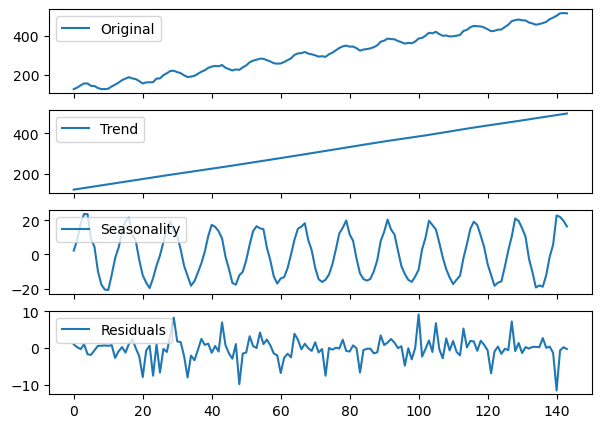

In [20]:
stl_decomposition = STL(endog=additive, period=12, robust=True).fit()
seas_decomp_plots(additive, stl_decomposition)

- The STL decomposition does a very good job on the `additive` time series.
- Next, we try with the `multiplicative` one.

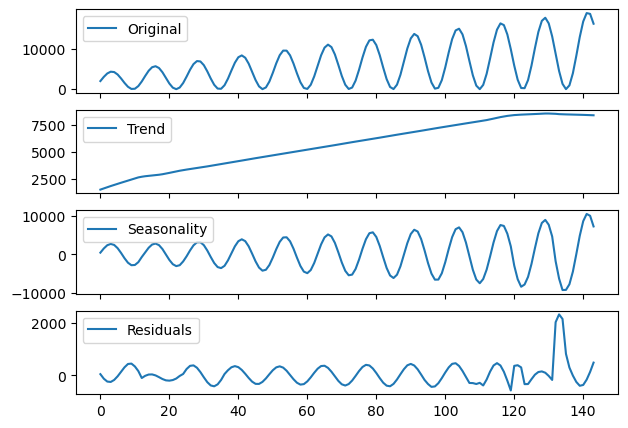

In [21]:
stl_decomposition = STL(endog=multiplicative, period=12, robust=True).fit()
seas_decomp_plots(multiplicative, stl_decomposition)

- This decomposition is not as good as the previous one.

### Which method to use?

Use ``seasonal_decompose`` when:

- Your time series data has a clear and stable seasonal pattern and trend.
- You prefer a simpler model with fewer parameters to adjust.
- The seasonal amplitude is constant over time (suggesting an additive model) or varies proportionally with the trend (suggesting a multiplicative model).

Use ``STL`` when:

- Your time series exhibits complex seasonality that may change over time.
- You need to handle outliers effectively without them distorting the trend and seasonal components.
- You are dealing with non-linear trends and seasonality, and you need more control over the decomposition process.

---

## Identify the dominant period/frequency

- ``seasonal_decompose`` expects the dominant period as a parameter. 
- In this example, we generated the ``seasonal`` component by hand as follows:

````python
seasonal = 20 + np.sin( time * 0.5) * 20
````

- We said that the period was *approximately* $12$.
- But, in general, how do we find it out 🤔?

- You can use one of the following techniques:
    - Plot the data and try to figure out after how many steps the cycle repeats.
    - Do an Autocorrelation Plot (more on this later).
    - Use the Fast Fourier Transform on a signal *without* trend.

- We will look more into FFT later on.
- For now, you can use the following function to compute the dominant period in the data.

In [22]:
def fft_analysis(signal):
    
    # Linear detrending
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept 
    detrended = signal - trend 
    
    fft_values = fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))

    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]

    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    print(f"Dominant Frequency: {dominant_frequency:.3f}")

    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    print(f"Dominant Period: {dominant_period:.2f} time units")
    
    return dominant_period, positive_frequencies, magnitudes

In [23]:
period, freqs, magnitudes = fft_analysis(seasonal)

Dominant Frequency: 0.076
Dominant Period: 13.09 time units


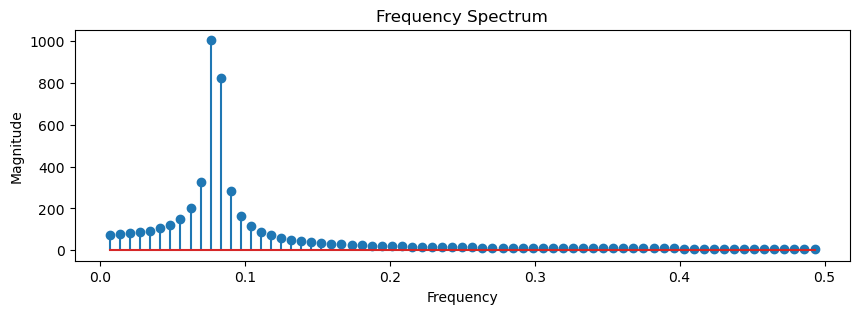

In [24]:
# Plotting the spectrum
plt.figure(figsize=(10, 3))
plt.stem(freqs, magnitudes)
plt.title('Frequency Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

- It turns out that the main seasonality was not exactly $12$.
- If we want to generate a periodic signal with seasonality $12$, we have to do as follows.

In [25]:
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20

In [26]:
fft_analysis(seasonal_12);

Dominant Frequency: 0.083
Dominant Period: 12.00 time units



---

## Summary

In this lecture we covered the following topics.
- The definition of a time series and examples of time series from the real world.
- The definition of time series analysis and examples of its application in different fields.
- A practical understanding of the three components of time series data.
- The additive, multiplicative, and pseudo-additive models.
- Standard approaches to decompose a time series in its constituent parts.

---

## Exercises


### Exercise 1

- Consider as the seasonal component the periodic signal with period 12
```python
time = np.arange(144)
seasonal_12 = 20 + np.sin(2*np.pi*time/12)*20
```
- Use `seasonal_12` and the `trend` and `residual` components below to define and plot the additive and the multiplicative models
```python
trend = time * 2.65 + 100
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))
```
- Perform the seasonal decomposition with `seasonal_decompose` and `STL` on the new signals and compare the results with the ones obtained in class, where we used an approximate period.
### Exercise 2
Load the two different time series as follows.
```python
import statsmodels.api as sm
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
print(len(ts_B))
```
- Plot the two time series.
- Determine if the time series looks additive or multiplicative models.
- Determine the main period of the seasonal component in the two time series.
### Exercise 3
- Decompose `ts_A` and `ts_B` using `seasonal_decompose` and `STL`.
- Comment on the results you obtain.
from statsmodels.tsa.seasonal import seasonal_decompose, STL